In [122]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [127]:
def CGenerator(log_return,vol,K,length):
    mu_log,std_log=0.00039257671314052006, 0.01693642141581437
    mu_vol,std_vol=18.089013173074335, 0.7978851106035849
    
    log_return_tran=(log_return-mu_log)/std_log
    vol_tran=(np.log(vol)-mu_vol)/std_vol
    x_past=np.concatenate([log_return_tran.reshape(-1,1),vol_tran.reshape(-1,1)],axis=-1)
    
    N=10
    x_past_all=x_past
    for i in range(N-1):
        x_past_all=np.concatenate([x_past_all,x_past],axis=1)

    
    x_p=torch.tensor(x_past_all,dtype=torch.float32).reshape(N,-1,2).to('cuda:0')
    
    
    for k in range(K):
        x_fake_future = G.sample(length, x_p)
        rtn=x_fake_future[:,:,0].cpu().detach().numpy()*std_log+mu_log
        price = np.exp(rtn)
        
        for i in range(N):
            price1=np.cumprod(price[i,:])
            plt.plot(price1)
        if k==0:
            log_return_all=rtn
        else:
            log_return_all=np.vstack((log_return_all,rtn))
    plt.show()
    return log_return_all

In [124]:
G=torch.load("generator.pt")

In [125]:
log_return=np.array([-0.00770281, -0.01140148,  0.02719203,  0.01568034, -0.00035873])
vol=np.array([ 7311850,  6338090,  7727110, 14450100, 14359500])

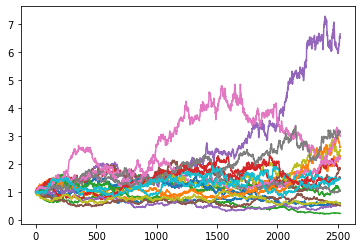

In [131]:
log_return_all=CGenerator(log_return,vol,K=2,length=2520)